Installing Dependencies

In [1]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        23.1.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
cachetools                   5.3.0
caer                         2.0.8
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
defusedxml                   0.7.1
executing                    1.2.0
fastjsonschema               2.16.3
filelock                     3.12.0
fl


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import tensorflow as tf
import os

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
tf.config.list_physical_devices('GPU')

[]

In [11]:
import cv2
import imghdr

In [12]:
data_dir = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz" 

In [15]:
download_url(data_dir, '.')

NameError: name 'download_url' is not defined

In [16]:
import torch
import numpy as np
import tarfile

from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

In [17]:
data_dir = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(data_dir, '.')

100%|███████████████████████████████████████████████████████████████| 135107811/135107811 [00:22<00:00, 5895031.10it/s]


In [18]:
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
        tar.extractall(path='./data')

In [19]:
data_dir = './data/cifar10'

Loading the data

In [21]:
import numpy as np
from matplotlib import pyplot as plt

In [22]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 60000 files belonging to 1 classes.


In [23]:
data_iterator = data.as_numpy_iterator()

In [24]:
batch = data_iterator.next()

In [27]:
batch[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

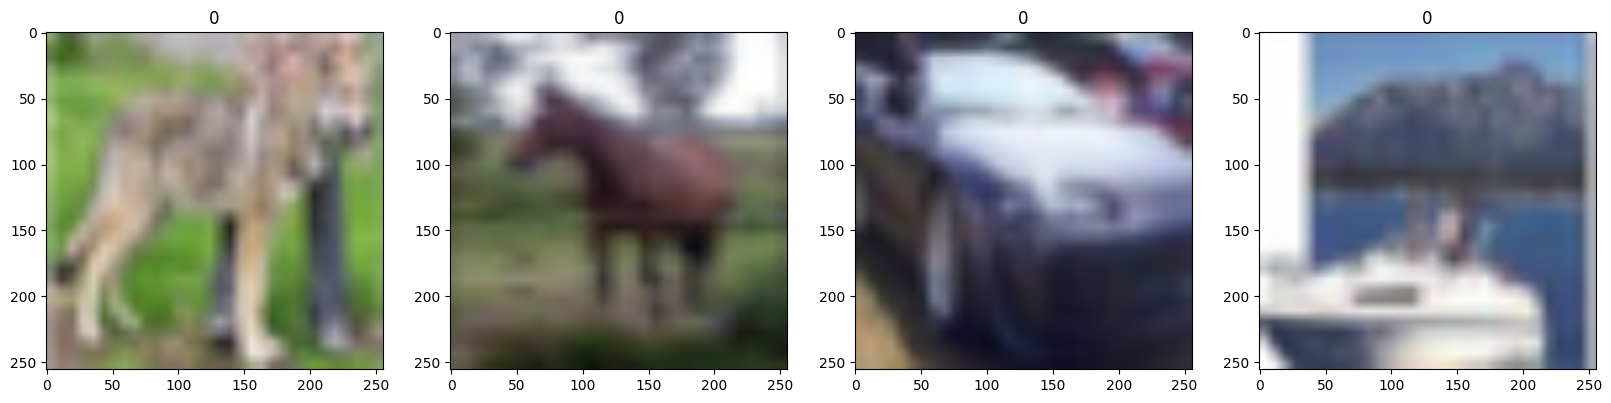

In [28]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scaling the Data

In [32]:
data = data.map(lambda x,y: (x/255, y))

In [33]:
data.as_numpy_iterator().next()

(array([[[[0.39607844, 0.39215687, 0.3647059 ],
          [0.39607844, 0.39215687, 0.3647059 ],
          [0.39607844, 0.39215687, 0.3647059 ],
          ...,
          [0.42352942, 0.44705883, 0.39607844],
          [0.42352942, 0.44705883, 0.39607844],
          [0.42352942, 0.44705883, 0.39607844]],
 
         [[0.39607844, 0.39215687, 0.3647059 ],
          [0.39607844, 0.39215687, 0.3647059 ],
          [0.39607844, 0.39215687, 0.3647059 ],
          ...,
          [0.42352942, 0.44705883, 0.39607844],
          [0.42352942, 0.44705883, 0.39607844],
          [0.42352942, 0.44705883, 0.39607844]],
 
         [[0.39607844, 0.39215687, 0.3647059 ],
          [0.39607844, 0.39215687, 0.3647059 ],
          [0.39607844, 0.39215687, 0.3647059 ],
          ...,
          [0.42352942, 0.44705883, 0.39607844],
          [0.42352942, 0.44705883, 0.39607844],
          [0.42352942, 0.44705883, 0.39607844]],
 
         ...,
 
         [[0.72156864, 0.65882355, 0.5647059 ],
          [0.72156

Splitting the Data

In [34]:
len(data)

1875

In [38]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [39]:
train_size+val_size+test_size 

1875

In [40]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Building the Deep Learning Model

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [42]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [43]:
model = Sequential()

In [44]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Training

In [47]:
logdir='logs'

In [48]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [49]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
1312/1312 [==============================] - 3590s 3s/step - loss: 5.8785e-04 - accuracy: 0.9993 - val_loss: 5.0544e-09 - val_accuracy: 1.0000
Epoch 2/20
1312/1312 [==============================] - 2077s 2s/step - loss: 2.1534e-10 - accuracy: 1.0000 - val_loss: 3.6412e-09 - val_accuracy: 1.0000
Epoch 3/20
1312/1312 [==============================] - 1962s 1s/step - loss: 1.6271e-10 - accuracy: 1.0000 - val_loss: 1.9045e-09 - val_accuracy: 1.0000
Epoch 4/20
1312/1312 [==============================] - 2178s 2s/step - loss: 9.6996e-11 - accuracy: 1.0000 - val_loss: 8.4247e-10 - val_accuracy: 1.0000
Epoch 5/20
1312/1312 [==============================] - 2035s 2s/step - loss: 5.0866e-11 - accuracy: 1.0000 - val_loss: 3.6567e-10 - val_accuracy: 1.0000
Epoch 6/20
1312/1312 [==============================] - 1977s 2s/step - loss: 2.6435e-11 - accuracy: 1.0000 - val_loss: 1.8973e-10 - val_accuracy: 1.0000
Epoch 7/20
1312/1312 [==============================] - 1699s 1s/step - loss

Plotting the Performance

In [51]:
hist.history

{'loss': [0.0005878527881577611,
  2.153438816154818e-10,
  1.6270944314111802e-10,
  9.699613334746005e-11,
  5.086573870438649e-11,
  2.6434854305534827e-11,
  1.5694969629498345e-11,
  1.037743935922153e-11,
  7.298203708039352e-12,
  5.352298031863212e-12,
  4.0260494590937945e-12,
  3.066762555709035e-12,
  2.3417676218301375e-12,
  1.7776360895435661e-12,
  1.3370837640205857e-12,
  9.977340134637025e-13,
  7.533953387366121e-13,
  5.838961584202218e-13,
  4.659522008683414e-13,
  3.825140074478761e-13],
 'accuracy': [0.9992616176605225,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [5.0544017859976975e-09,
  3.6412373116689878e-09,
  1.904496338411832e-09,
  8.424744235568937e-10,
  3.65670244084626e-10,
  1.8973386750609222e-10,
  1.1373246788792812e-10,
  7.451262523661129e-11,
  5.2001628697562197e-11,
  3.745304413826922e-11,
  2.7690962370319205e-11,
  2.0743113823828985e-11

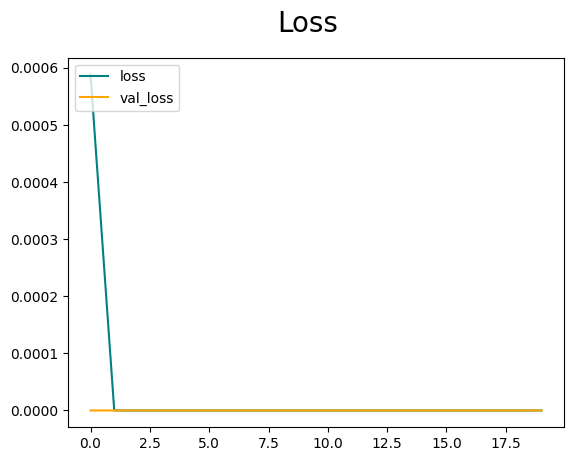

In [52]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss vs No.epochs', fontsize=20)
plt.legend(loc="upper left")
plt.show()

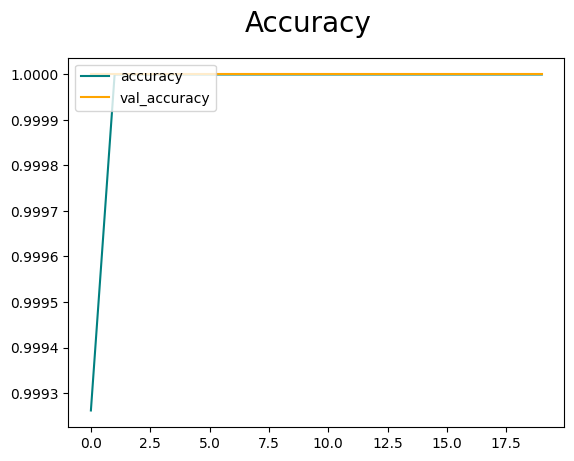

In [53]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()